In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.style.use('seaborn-bright')
from datetime import timedelta
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import *
from xgboost import XGBRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from statsmodels.graphics.tsaplots import *
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\moham\AppData\Roaming\Python\Python39\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
data = pd.read_csv('C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\HUDaily.csv', index_col=0, parse_dates=True)

data.head()

,Electric,Gas,Water,temp,dew_point,pressure,humidity,wind_speed
Datetime,,,,,,,,
2010-02-02,101.613979,139.386646,0.102313,4.377917,3.256250,1005.291667,92.458333,5.823750
2010-02-03,98.845000,182.338125,0.375250,1.380000,0.423750,1007.625000,93.333333,2.943750
2010-02-04,97.897604,152.264583,0.428312,5.105833,4.458333,1004.333333,95.666667,4.350000
2010-02-05,87.718333,134.719208,0.377042,6.210417,5.026250,999.625000,92.333333,3.540417
2010-02-06,55.565125,135.339687,0.089542,3.039167,2.714167,1015.208333,97.750000,3.332917


In [3]:
data.describe()

,Electric,Gas,Water,temp,dew_point,pressure,humidity,wind_speed
count,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000
mean,63.124290,77.171669,0.366591,10.479515,7.255238,1014.517249,81.640983,4.404030
std,16.720286,56.753536,0.214808,5.329819,4.721281,10.961194,8.567249,1.807310
min,10.604167,0.000000,0.000000,-6.250000,-6.898750,972.791667,53.083333,0.822917
25%,49.395833,30.233885,0.180656,6.457292,3.725625,1007.916667,75.458333,3.054167
50%,64.270833,62.502854,0.360042,10.445000,7.406250,1015.541667,82.125000,4.157917
75%,77.181958,115.686646,0.525896,14.730417,10.982500,1021.875000,88.166667,5.521250
max,106.865021,301.760604,1.058563,26.625417,18.644167,1047.125000,100.000000,12.804583


In [4]:
# data = data.loc[:'2020-03-15']

In [5]:
X, y = data.drop('Electric', axis=1), data['Electric']

X

,Gas,Water,temp,dew_point,pressure,humidity,wind_speed
Datetime,,,,,,,
2010-02-02,139.386646,0.102313,4.377917,3.256250,1005.291667,92.458333,5.823750
2010-02-03,182.338125,0.375250,1.380000,0.423750,1007.625000,93.333333,2.943750
2010-02-04,152.264583,0.428312,5.105833,4.458333,1004.333333,95.666667,4.350000
2010-02-05,134.719208,0.377042,6.210417,5.026250,999.625000,92.333333,3.540417
2010-02-06,135.339687,0.089542,3.039167,2.714167,1015.208333,97.750000,3.332917
...,...,...,...,...,...,...,...
2022-02-25,216.273479,0.346646,6.274167,2.117083,1024.291667,75.083333,5.198333
2022-02-26,125.443313,0.337521,5.840417,1.968750,1028.250000,76.916667,5.150833
2022-02-27,105.929896,0.341687,5.664583,0.662917,1023.250000,71.291667,5.717917


In [6]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<AxesSubplot:xlabel='Datetime'>

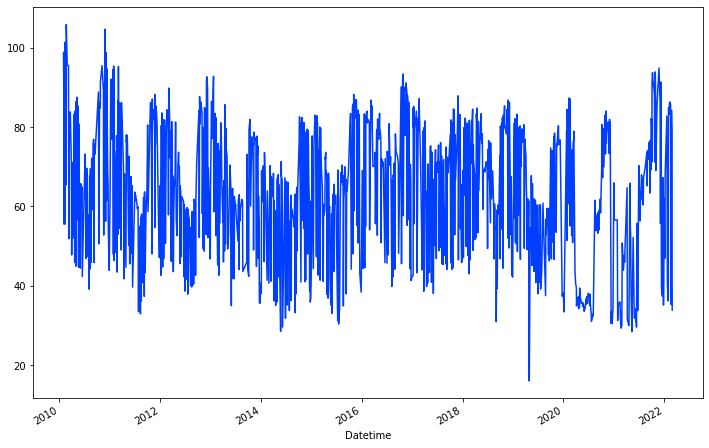

In [8]:
y_test.plot()

In [9]:
# xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree = 1, learning_rate = 0.001, max_depth = 7, alpha = 10, n_estimators = 5000)

xg_reg = XGBRegressor(n_estimators =25000, learning_rate=0.1)

# xg_reg = XGBRegressor(objective='reg:squarederror',
#     n_estimators=5000,
#     learning_rate=0.1,
#     subsample=0.5,
#     colsample_bytree=1, 
#     max_depth=7,
# )

In [10]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [11]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)


print("RMSE: %.3f" % (rmse))
print("MSE: %.3f" % (mse))
print("MAE: %.3f" % (mae))
print("R2 Score: %.3f" % (r2))

RMSE: 9.621
MSE: 92.554
MAE: 7.312
R2 Score: 0.651


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

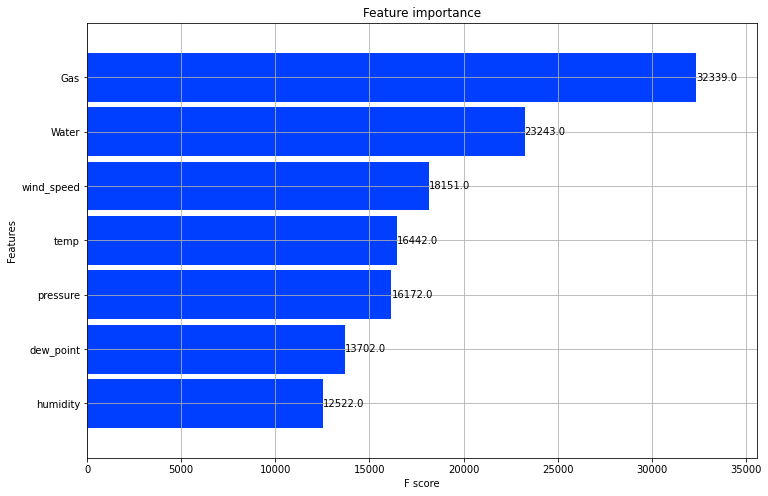

In [12]:
from xgboost import plot_importance

feature_importance = plot_importance(xg_reg, height=0.9)
feature_importance

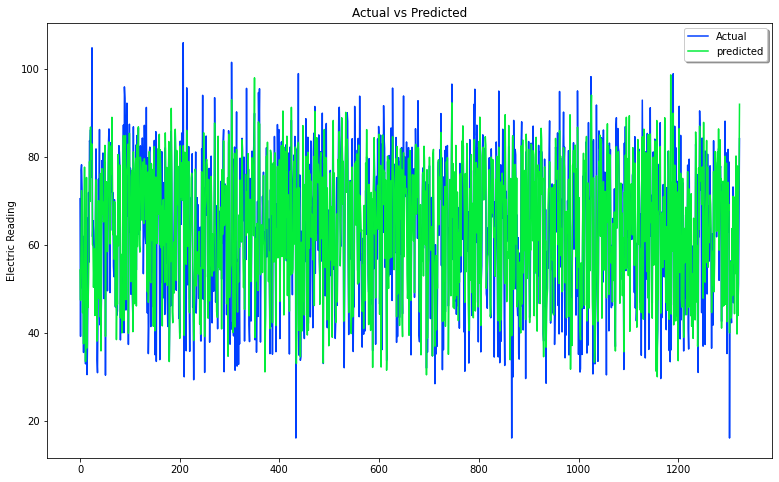

In [13]:
plt.figure(figsize=(13,8))
plt.plot(list(y_test))
plt.plot(list(preds))
plt.title("Actual vs Predicted")
plt.ylabel("Electric Reading")
plt.legend(('Actual','predicted'), shadow=True)
plt.show()

In [14]:
# params = {"objective":"reg:squarederror",
#             'colsample_bytree': 1,
#             'learning_rate': 0.1,
#             'max_depth': 7, 
#             'alpha': 10}

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=50,
#                     num_boost_round=999,early_stopping_rounds=50,metrics="rmse", as_pandas=True, seed=123)

In [15]:
# cv_results.head()

In [16]:
# print((cv_results["test-rmse-mean"]).tail(1))